# Py: Neural Net Spam Detection
Originally published in DAA M05 Classification and neural networks.
## Exercise 5.18 - Spam detection with a neural network

### Purpose:
This notebook fits a neural network to the spam dataset that is described in Section 5.1.2 of Module 5. This code is used in Exercise 5.18.

### References:
The spam dataset is sourced from the University of California, Irvine Machine Learning Repository:   Hopkins, M., Reeber, E., Forman, G., and Suermondt, J. (1999). Spambase Data Set [Dataset]. https://archive.ics.uci.edu/ml/datasets/Spambase.

This dataset contains the following:
- 4,601 observations, each representing an email originally collected from a Hewlett-Packard email server, of which 1,813 (39%) were identified as spam;
- 57 continuous features:
  - 48 features of type ‘word_freq_WORD’ that represent the percentage (0 to 100) of words in the email that match ‘WORD’;
  - 6 features of type ‘char_freq_CHAR’ that represent the percentage (0 to 100) of characters in the email that match ‘CHAR’;
  - 1 feature, ‘capital_run_length_average’, that is the average length of uninterrupted sequences of capital letters in the email;
  - 1 feature, ‘capital_run_length_longest’, that is the length of the longest uninterrupted sequence of capital letters in the email; and
  - 1 feature, ‘capital_run_length_total’, that is the total number of capital letters in the email; and
- a binary response variable that takes on a value 0 if the email is not spam and 1 if the email is spam.

## Packages
This section imports the packages that will be required for this exercise/case study.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Used to build the neural network and evaluate it.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Data
This section:
- imports the data that will be used in the modelling; and
- explores the data.

### Import data

In [ ]:
# Create a list of headings for the data.
namearray = [
'word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'Spam_fl' ]

# Read in the data from the Stanford website.
spam = pd.read_csv("http://www.web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data", delim_whitespace=True, 
                   header=None,
                   names=namearray
                 )

### Explore data (EDA)

In [ ]:
# Check the dimensions of the data.
print(spam.info())

# Print the first 10 observations from the data.
print(spam.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## Modelling
This section:
- fits a model; and
- evaluates the fitted model.

### Fit model

In [ ]:
# Build a neural network to classify an email as spam or non-spam.

# Change the pandas dataframe to numpy arrays containing the features (X) and response(Y).
X = spam.iloc[:,:-1].values # Drops the last column of the dataframe that contains the spam indicator (response).
Y = spam.iloc[:,57:58].values

# Standardise the data so that each feature has mean 0 and standard deviation 1.
sc = StandardScaler()
X = sc.fit_transform(X)

# Encode the response variable ('not spam' or 'spam') as 2 outcomes.
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

# Split the data into train and test sets 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)
                                # This separates the data into training (75%) and test (25%) datasets.

# Build a neural network with two hidden layers, containing 28 hidden neurons
# (16 neurons in the first hidden layer and 12 neurons in the second hidden layer).
model = Sequential()
# Create a hidden layer with 16 neurons, an input dimension of 57,
# representing the features of the dataset and a ReLU activation function.
model.add(Dense(16, input_dim=57, activation="relu"))
# Create a second hidden layer with 12 neurons and a ReLU activation function.
model.add(Dense(12, activation="relu"))
# Create the output layer with 2 neurons representing 'spam' and 'not spam'.
model.add(Dense(2, activation="softmax"))

# Compile the model using the binary cross entropy loss function (logistic loss),
# the Adam optimiser (adaptive momentum estimation) which is an enhanced version
# of stochastic gradient descent (SGD), and capture the accuracy of model predictions.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])                                         

# Fit the model.
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100
54/54 [==============================] - 1s 7ms/step - loss: 0.6300 - accuracy: 0.7084 - val_loss: 0.5662 - val_accuracy: 0.7498
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.8203 - val_loss: 0.4174 - val_accuracy: 0.8497
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8838 - val_loss: 0.2950 - val_accuracy: 0.9001
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9067 - val_loss: 0.2381 - val_accuracy: 0.9209
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9151 - val_loss: 0.2084 - val_accuracy: 0.9314
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9223 - val_loss: 0.1920 - val_accuracy: 0.9305
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9275 - val_loss: 0.1829 - val_accuracy: 0.9366
Epoch 8/100
5

### Evaluate model

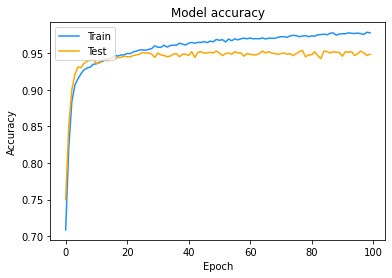

In [ ]:
# Plot the accuracy of the fitted model on the training and test data.
plt.plot(history.history['accuracy'], color='dodgerblue')
plt.plot(history.history['val_accuracy'],color='orange')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The plot of the model's accuracy against the number of epochs suggests that accuracy on the test data does not improve much beyond approximately 10 epochs (cycles through the full dataset).